In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv_path = "archive/NFLX.csv"
df = pd.read_csv(csv_path)
df = df[['Date', 'Open', 'High', 'Low', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'].dt.year >= 2021]

In [3]:
df['Date'].unique()

<DatetimeArray>
['2021-01-04 00:00:00', '2021-01-05 00:00:00', '2021-01-06 00:00:00',
 '2021-01-07 00:00:00', '2021-01-08 00:00:00', '2021-01-11 00:00:00',
 '2021-01-12 00:00:00', '2021-01-13 00:00:00', '2021-01-14 00:00:00',
 '2021-01-15 00:00:00',
 ...
 '2022-01-24 00:00:00', '2022-01-25 00:00:00', '2022-01-26 00:00:00',
 '2022-01-27 00:00:00', '2022-01-28 00:00:00', '2022-01-31 00:00:00',
 '2022-02-01 00:00:00', '2022-02-02 00:00:00', '2022-02-03 00:00:00',
 '2022-02-04 00:00:00']
Length: 276, dtype: datetime64[ns]

In [4]:
df_2021 = df[df['Date'].dt.year == 2021]
months_2021 = df_2021['Date'].dt.month
months_2021 = set(months_2021)
print(months_2021)

df_2022 = df[df['Date'].dt.year == 2022]
months_2022 = df_2022['Date'].dt.month
months_2022 = set(months_2022)
print(months_2022)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
{1, 2}


In [5]:
str_months_2021 = ['01','02','03','04','05','06','07','08','09','10','11','12']
str_months_2022 = ['01','02']

In [6]:
x_axis = [f'{2021}-{month}' for month in str_months_2021] + [f'{2022}-{month}' for month in str_months_2022]
y_axis = []
for month in months_2021:
    df_filtered_year = df[df['Date'].dt.year == 2021]
    month_price = df_filtered_year.loc[df_filtered_year['Date'].dt.month == month, ['Close']]
    month_price = np.mean(month_price['Close'])
    y_axis.append(month_price)

for month in months_2022:
    df_filtered_year = df[df['Date'].dt.year == 2022]
    month_price = df_filtered_year.loc[df_filtered_year['Date'].dt.month == month, ['Close']]
    month_price = np.mean(month_price['Close'])
    y_axis.append(month_price)


df_monthly = pd.DataFrame(y_axis, x_axis)
df_monthly.columns = ['Monthly Average Close Price']
df_monthly

,Monthly Average Close Price
2021-01,526.816845
2021-02,548.959999
2021-03,518.123482
2021-04,533.136662
2021-05,496.714497
2021-06,503.324091
2021-07,528.653330
2021-08,532.346817
2021-09,590.795239
2021-10,642.202849


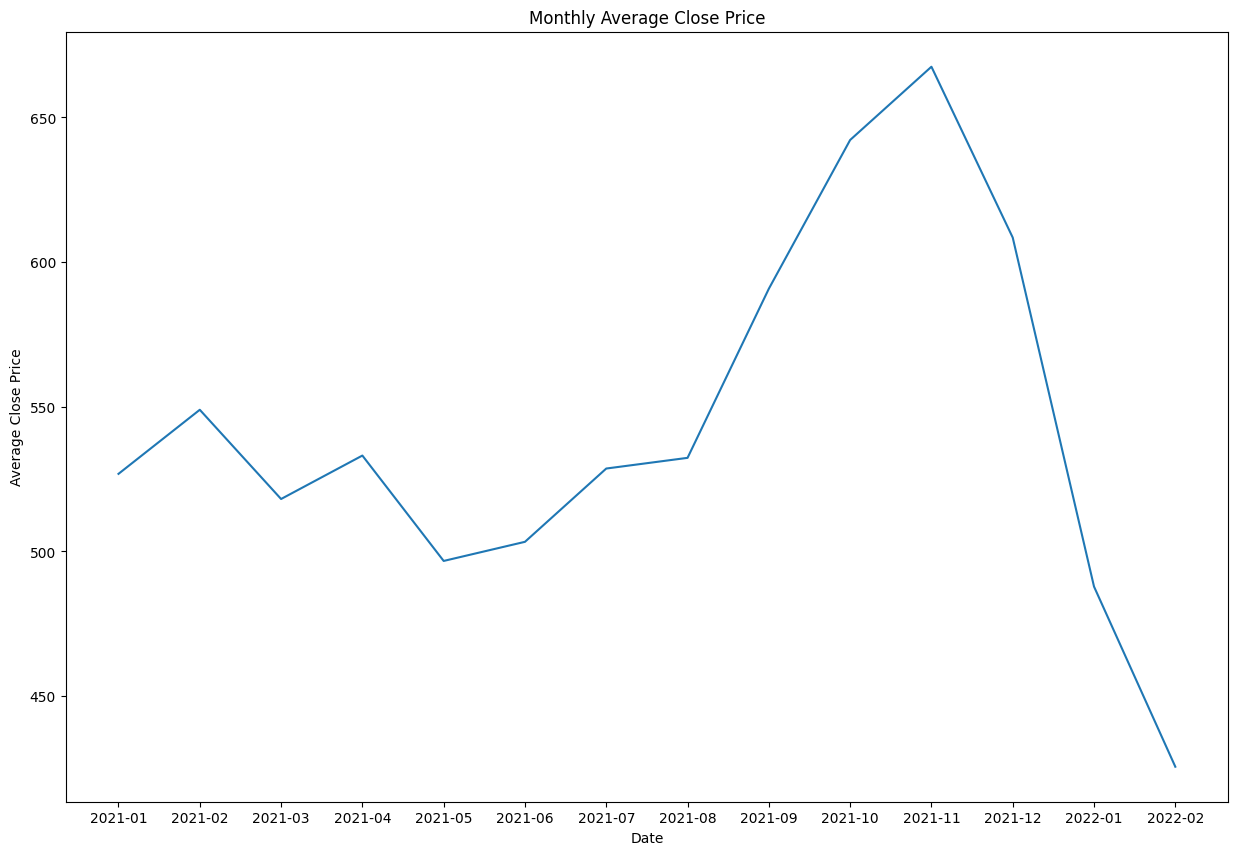

In [7]:
plt.figure(figsize=(15,10))
plt.plot(df_monthly)
plt.title('Monthly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.savefig('Problem_C.png')